In [135]:
import string

import pandas as pd
import wikipedia

articles = ['Computer security',
            'Automotive security',
            'Cybercrime', 
            'Cybersex trafficking',
            'Computer fraud',
            'Cybergeddon', 
            'Cyberterrorism',
            'Cyberwarfare',
            'Electromagnetic warfare',
            'Information warfare',
            'Internet security ', 
            'Mobile security', 
            'Network security', 
            'Copy protection',
            'Advanced persistent threat',
            
            
         'Johann Sebastian Bach',
          'Eduard Schütt',
          'Wolfgang Amadeus Mozart',
          'Pyotr Ilyich Tchaikovsky',
          'Frédéric Chopin',
          'Giuseppe Verdi',
          'Richard Wagner',
          'Antonio Vivaldi',
          'George Frideric Handel',
          'Franz Schubert',
          'Johannes Brahms',
          'Igor Stravinsky',
          'Dmitri Shostakovich',
          'Claude Debussy',
          'Maurice Ravel',
            
            
            'Caucasus',
            'Dagestan',
            'Chechnya',
            'Ingushetia',
            'Kabardino-Balkaria',
            'Adygea',
            'Lezgins',
            'Lezgistan',
            'Caucasian Albania',
            'Makhachkala',
            'Derbent',
            'Kizlyar',
            
            
            
            
            ]


In [136]:

print(f"Amount of articles : {len(articles)}")
count = 1
wiki_lst = []
for articl in articles:
    wiki_lst.append(wikipedia.page(articl).content)
    print(f"{count}. appended : {articl}")
    count += 1


Amount of articles : 42
1. appended : Computer security
2. appended : Automotive security
3. appended : Cybercrime
4. appended : Cybersex trafficking
5. appended : Computer fraud
6. appended : Cybergeddon
7. appended : Cyberterrorism
8. appended : Cyberwarfare
9. appended : Electromagnetic warfare
10. appended : Information warfare
11. appended : Internet security 
12. appended : Mobile security
13. appended : Network security
14. appended : Copy protection
15. appended : Advanced persistent threat
16. appended : Johann Sebastian Bach
17. appended : Eduard Schütt
18. appended : Wolfgang Amadeus Mozart
19. appended : Pyotr Ilyich Tchaikovsky
20. appended : Frédéric Chopin
21. appended : Giuseppe Verdi
22. appended : Richard Wagner
23. appended : Antonio Vivaldi
24. appended : George Frideric Handel
25. appended : Franz Schubert
26. appended : Johannes Brahms
27. appended : Igor Stravinsky
28. appended : Dmitri Shostakovich
29. appended : Claude Debussy
30. appended : Maurice Ravel
31. a

In [123]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [124]:
print(len(wiki_lst))

41


In [97]:
# Прерпоцессинг текста, приведение к ловеркейсу, стемминг
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /home/cere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)
# - ты садист?
# - я дивергент
print(stop_words)
print(punct)

{'i', 'o', 'won', 'itself', 'doing', 'into', 'don', 'nor', 'me', 'our', 'should', 'no', 'until', 'it', 'because', 'myself', 'in', 'hers', 'aren', 'as', "you're", 'him', 'by', 'or', "hasn't", 'any', 'himself', 'their', 'before', 'then', "shan't", "mightn't", "hadn't", 'wouldn', 'hasn', 'most', 'both', 'than', 'theirs', 'just', 'couldn', 't', 'can', 'didn', 'the', 'further', 'that', "she's", 'down', 'why', 'they', "it's", 'mustn', 'were', 'a', "isn't", "wasn't", "you'd", 'she', 'weren', 'how', "you'll", 'who', 'some', "doesn't", 'too', 'ours', 'an', 'there', 'once', 'your', 'when', 'below', 'over', 'shan', 'under', 'same', "should've", 'yourself', 'his', 'again', 'which', 'not', 'very', 'above', "didn't", 'all', 'haven', 'ourselves', 'themselves', 'its', 'other', 'have', 'with', 'to', 'and', 'ma', 'does', 'had', 'are', 'needn', 'out', 'off', 'isn', 'between', 'herself', 'be', 'for', 'hadn', 'here', 'those', 'my', 'such', 'did', 'll', "shouldn't", 'do', 'wasn', "don't", 'y', 'of', 'ain', 

In [138]:

def text_preprocessing(text: string):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punct]
    return " ".join(filtered_words)


text = "Reverse engineering is cool, isn't it?"
print(text_preprocessing(text))

reverse engineering cool n't


In [139]:
nlp = spacy.load('en_core_web_sm')

In [140]:
def preprocess(text: string):
    text = nlp(text.lower())
    processed_text = []
    for token in text:
        if (token.text not in punct) and (token.text not in stop_words):
            processed_text.append(token.lemma_)

    return " ".join(processed_text)


In [141]:

processed_text = []
for article in wiki_lst:
    processed_text.append(preprocess(article))

In [142]:


# idk what is it some shaitan shit below
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(wiki_lst)

In [143]:
print(X)

  (0, 13749)	0.004759467479180089
  (0, 744)	0.004759467479180089
  (0, 694)	0.004759467479180089
  (0, 159)	0.009518934958360177
  (0, 8725)	0.003948511595182461
  (0, 7519)	0.004759467479180089
  (0, 9314)	0.004759467479180089
  (0, 15279)	0.004759467479180089
  (0, 2801)	0.004759467479180089
  (0, 15337)	0.004759467479180089
  (0, 12475)	0.004759467479180089
  (0, 2798)	0.004759467479180089
  (0, 15801)	0.004759467479180089
  (0, 7331)	0.0036874421124094073
  (0, 17128)	0.0036874421124094073
  (0, 617)	0.0029997540314268835
  (0, 3799)	0.009518934958360177
  (0, 164)	0.004759467479180089
  (0, 4497)	0.004285088697302301
  (0, 13018)	0.004285088697302301
  (0, 2931)	0.004285088697302301
  (0, 4778)	0.002255671321444091
  (0, 8698)	0.004759467479180089
  (0, 8895)	0.0021255415513552274
  (0, 8032)	0.004759467479180089
  :	:
  (41, 6307)	0.010472462718093049
  (41, 11538)	0.01853453187201971
  (41, 1888)	0.011509123317404857
  (41, 4018)	0.012074165330633152
  (41, 14669)	0.01150912331

In [144]:
print(vectorizer.get_feature_names_out())

['000' '00161' '0020' ... 'ḥamīd' 'ḳavḳasosi' 'ἀλβανία']


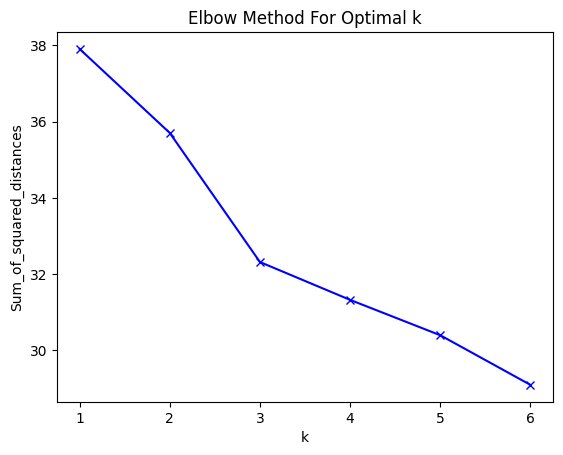

In [159]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1, 7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [160]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600)
model.fit(X)
labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(articles, labels)), columns=['title', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
20              Giuseppe Verdi        0
22             Antonio Vivaldi        0
21              Richard Wagner        0
25             Johannes Brahms        0
19             Frédéric Chopin        0
18    Pyotr Ilyich Tchaikovsky        0
17     Wolfgang Amadeus Mozart        0
16               Eduard Schütt        0
15       Johann Sebastian Bach        0
26             Igor Stravinsky        0
27         Dmitri Shostakovich        0
23      George Frideric Handel        0
28              Claude Debussy        0
29               Maurice Ravel        0
24              Franz Schubert        0
30                    Caucasus        1
31                    Dagestan        1
32                    Chechnya        1
33                  Ingushetia        1
34          Kabardino-Balkaria        1
35                      Adygea        1
36                     Lezgins        1
37                   Lezgistan        1
38           Caucasian Albania        1


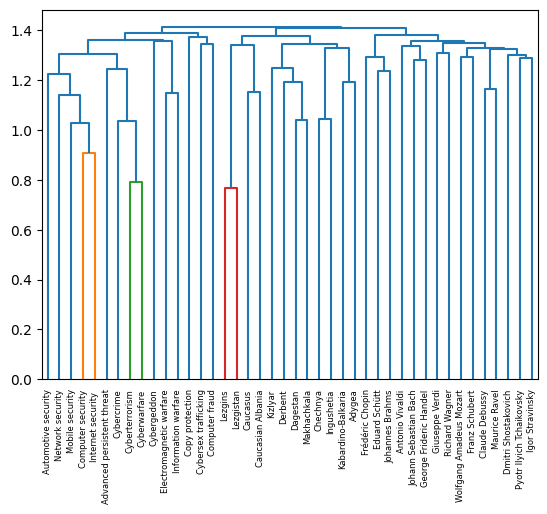

In [161]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(X.toarray(), method='complete')
dendrogram(mergings,
           labels=articles,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()